# OMPython demo

This demo shows using OpenModelica directly from Python. If not installed already, follow instructions at https://github.com/OpenModelica/OMPython

The following code will inicialize model of Bouncing Ball - part of shared test model.

In [1]:
from OMPython import OMCSessionZMQ
omc = OMCSessionZMQ()
model_path=omc.sendExpression("getInstallationDirectoryPath()") + "/share/doc/omc/testmodels/"
from OMPython import ModelicaSystem
mod=ModelicaSystem(model_path + "BouncingBall.mo","BouncingBall")

2019-12-16 09:23:33,791 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vagrant.port.66b55be15b1a43828c705dacf72144f6 pid=4935
2019-12-16 09:23:34,203 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vagrant.port.e5b8f0a88a6f4cbbbae88634f03cc533 pid=4939


We build and simulate the model till 10 s with tolerance 1e-6.

In [2]:
mod.buildModel()
mod.setSimulationOptions(["stopTime=10.0","tolerance=1e-06"])
mod.simulate()

In order to read `.mat`file, there exist DyMat library for Python for reading and exporting files from this data file. Install it by `pip install DyMat`. https://www.j-raedler.de/projects/dymat/

In [3]:
import DyMat

In [4]:
d = DyMat.DyMatFile('BouncingBall_res.mat')


In [5]:
def plot(x,y,z=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(x,y,'r')
    if z is not None:
        plt.plot(x,z,'b')
    plt.show()


The 'time' variable is stored next to each model variable as abscissa. In order to get time values related to the variable values call `d.abscissa('variable_name',valuesOnly=True)`

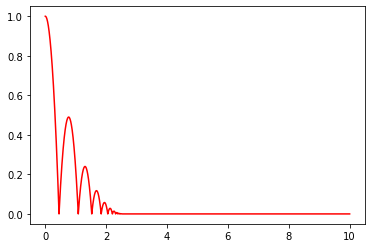

In [6]:
plot(d.abscissa('h',valuesOnly=True),d['h'])

It's possible to define inline model and write it to file.

In [7]:
%%writefile TestModel.mo
model TestModel2
  Real x;
equation
  der(x) = 1-x;
end TestModel2;


Overwriting TestModel.mo


Now load, build and simulate the model.

In [8]:
mod2 = ModelicaSystem("TestModel.mo","TestModel2")
mod2.buildModel()

2019-12-16 09:25:53,058 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vagrant.port.bcce5b0d08854e539c1a188c1d1fe1df pid=5080


Expected end of text (at char 192), (line:1, col:193)
Expected end of text (at char 192), (line:1, col:193)


In [9]:
mod2.setSimulationOptions(["stopTime=10.0","tolerance=1e-06"])

In [10]:
mod2.simulate()

And plot results. Time vairable can be obtained from variable `abscissa`.

In [11]:
d2 = DyMat.DyMatFile('TestModel2_res.mat')

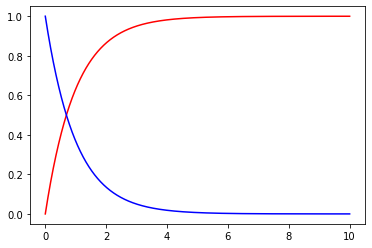

In [12]:
plot(d2.abscissa('x',valuesOnly=True),d2['x'],d2['der(x)'])